# <div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">تشخیص چهره و چشم با الگوریتم haarcascade</div>

<div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">برای دانلود مدل‌های از قبل آموزش دیده شده به آدرس زیر مراجعه کنید:</div>

https://github.com/opencv/opencv/tree/4.x/data/haarcascades

### <div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">تشخیص چهره</div>

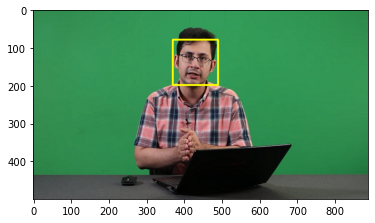

In [1]:
import cv2
import matplotlib.pyplot as plt

face_cascade = cv2.CascadeClassifier()
face_cascade.load('haarcascade_frontalface_alt.xml')

image = cv2.imread('images/green-sccreen.png')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
gray = cv2.equalizeHist(gray)

faces = face_cascade.detectMultiScale(gray)

for (x,y,w,h) in faces:
    cv2.rectangle(image, (x,y), (x+w,y+h), (0,255,255), 3)

plt.imshow(image[...,::-1])

### <div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">پیدا کردن چشم‌ها در محدوده‌ی چهره</div>

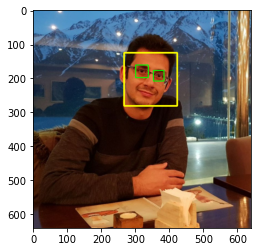

In [2]:
import cv2
import matplotlib.pyplot as plt

face_cascade = cv2.CascadeClassifier()
eyes_cascade = cv2.CascadeClassifier()
face_cascade.load('haarcascade_frontalface_alt.xml')
eyes_cascade.load('haarcascade_eye.xml')


image = cv2.imread('images/akhavan.jpg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
gray = cv2.equalizeHist(gray)

faces = face_cascade.detectMultiScale(gray)

for (x,y,w,h) in faces:
    cv2.rectangle(image, (x,y), (x+w,y+h), (0,255,255), 3)
    roi_gray = gray[y:y+h, x:x+w]
    eyes = eyes_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(image,(x+ex,y+ey),(x+ex+ew,y+ey+eh),(0,255,0),2)
    
plt.imshow(image[...,::-1]);

### <div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">نمایش چهره در تصویر وبکم</div>

In [3]:
import cv2

face_cascade = cv2.CascadeClassifier()
eyes_cascade = cv2.CascadeClassifier()
face_cascade.load('haarcascade_frontalface_alt.xml')
eyes_cascade.load('haarcascade_eye.xml')

def detectAndDisplay(frame):
    frame_gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    frame_gray = cv2.equalizeHist(frame_gray)
    faces = face_cascade.detectMultiScale(frame_gray)
    for (x,y,w,h) in faces:
        center = (x + w//2, y + h//2)
        frame = cv2.ellipse(frame, center, (w//2, h//2), 0, 0, 360, (255, 0, 255), 4)
        faceROI = frame_gray[y:y+h,x:x+w]
        #-- In each face, detect eyes
        eyes = eyes_cascade.detectMultiScale(faceROI)
        for (x2,y2,w2,h2) in eyes:
            eye_center = (x + x2 + w2//2, y + y2 + h2//2)
            radius = int(round((w2 + h2)*0.25))
            frame = cv2.circle(frame, eye_center, radius, (255, 0, 0 ), 4)
    cv2.imshow('Face detection', frame)

    
    
cap = cv2.VideoCapture(0)
if not cap.isOpened:
    print('--(!)Error opening video capture')
    exit(0)
while True:
    ret, frame = cap.read()
    if frame is None:
        print('--(!) No captured frame -- Break!')
        break
    detectAndDisplay(frame)
    if cv2.waitKey(1) == 27:
        break
cap.release()
cv2.destroyAllWindows() 

<div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">همچنین برای آموزش روی داده دلخواهتان می‌توانید لینک زیر را مطالعه فرمایید:</div>

[Cascade Classifier Training](https://docs.opencv.org/4.x/dc/d88/tutorial_traincascade.html)

https://docs.opencv.org/4.x/db/d28/tutorial_cascade_classifier.html